In [0]:
#https://www.kaggle.com/rajmehra03/intro-to-parameter-tuning-in-scikit-acc-0-9175

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from google.colab import files
uploaded = files.upload()

Saving winequality.csv to winequality (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['winequality.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
df.shape

(6497, 16)

In [0]:
df.columns # the Flavors (Grade) is the target variable that we have to predict.

Index(['Tartaric acid concentration (g/dm3)',
       'Acetic acid concentration (g/dm3)',
       'Citric acid concentration (g/dm3)',
       'Residual sugar concentration (g/dm3)',
       'Sodium chloride concentration (g/dm3)',
       'Free sulfite concentration (mg/dm3)',
       'Total sulfite concentration (mg/dm3)', 'Density (g/dm3)', 'pH',
       'Potassium sulfate concentration (g/dm3)', 'Alcohol content (% vol.)',
       'Flavors (Grade)', 'Flavors (Rating)', 'Type', 'Producer Name',
       'producer code'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
Tartaric acid concentration (g/dm3)        6497 non-null float64
Acetic acid concentration (g/dm3)          6497 non-null float64
Citric acid concentration (g/dm3)          6497 non-null float64
Residual sugar concentration (g/dm3)       6497 non-null float64
Sodium chloride concentration (g/dm3)      6497 non-null float64
Free sulfite concentration (mg/dm3)        6497 non-null float64
Total sulfite concentration (mg/dm3)       6497 non-null float64
Density (g/dm3)                            6497 non-null float64
pH                                         6497 non-null float64
Potassium sulfate concentration (g/dm3)    6497 non-null float64
Alcohol content (% vol.)                   6497 non-null float64
Flavors (Grade)                            6497 non-null int64
Flavors (Rating)                           6497 non-null object
Type                                       6497 non

In [0]:
df.isnull().sum() # no null or Nan values.

Tartaric acid concentration (g/dm3)        0
Acetic acid concentration (g/dm3)          0
Citric acid concentration (g/dm3)          0
Residual sugar concentration (g/dm3)       0
Sodium chloride concentration (g/dm3)      0
Free sulfite concentration (mg/dm3)        0
Total sulfite concentration (mg/dm3)       0
Density (g/dm3)                            0
pH                                         0
Potassium sulfate concentration (g/dm3)    0
Alcohol content (% vol.)                   0
Flavors (Grade)                            0
Flavors (Rating)                           0
Type                                       0
Producer Name                              0
producer code                              0
dtype: int64

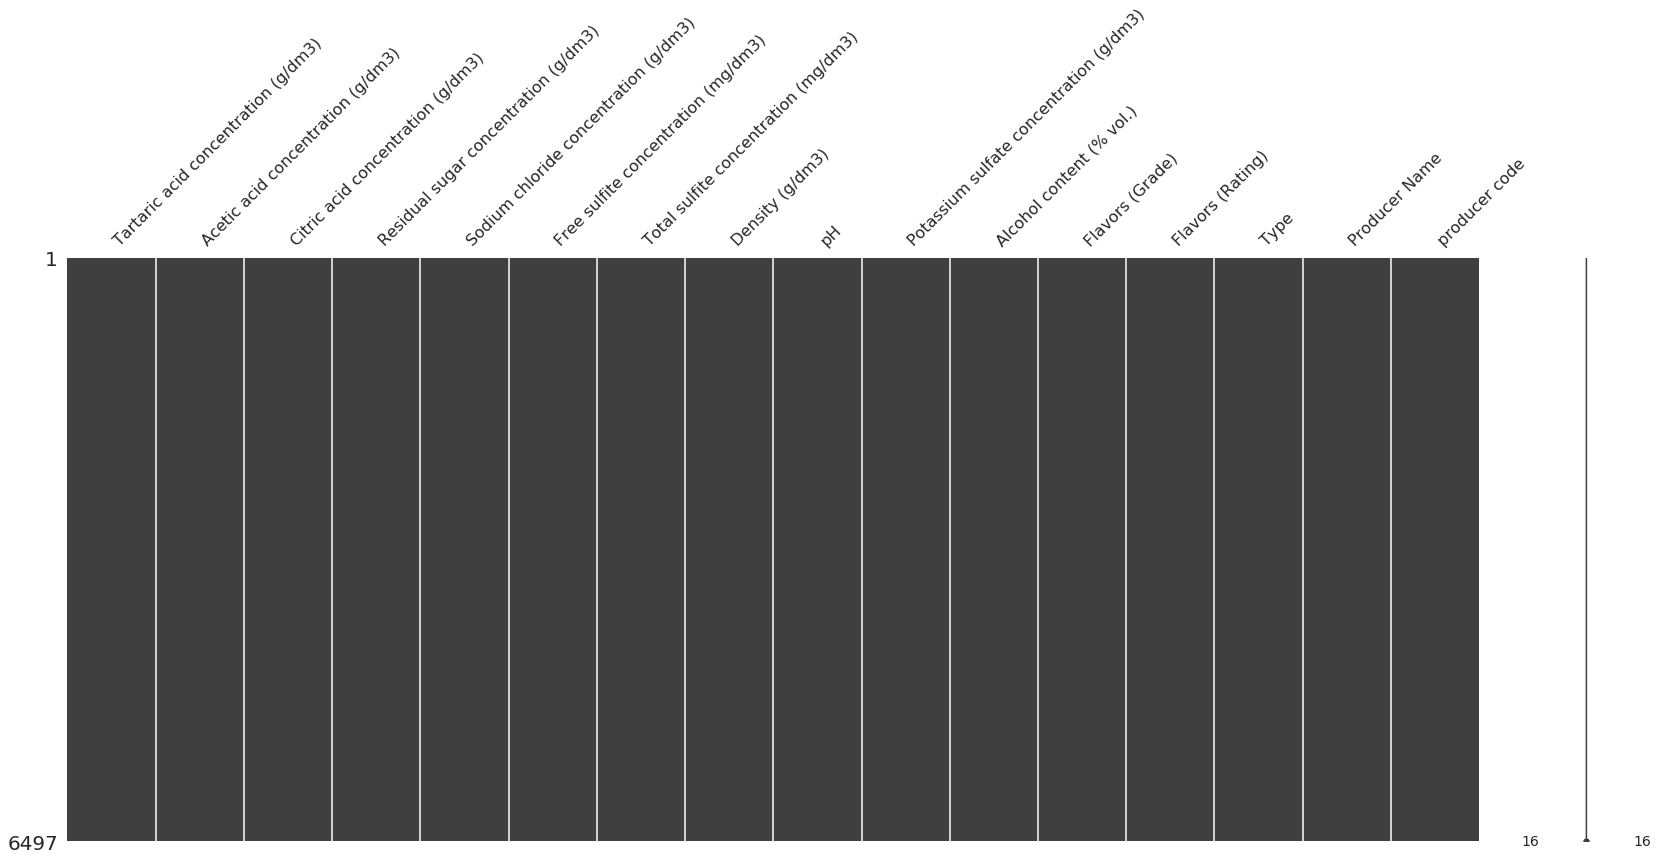

In [0]:
msno.matrix(df)  # just to visualize. no missing values.

In [0]:
df.describe(include='all')

,Tartaric acid concentration (g/dm3),Acetic acid concentration (g/dm3),Citric acid concentration (g/dm3),Residual sugar concentration (g/dm3),Sodium chloride concentration (g/dm3),Free sulfite concentration (mg/dm3),Total sulfite concentration (mg/dm3),Density (g/dm3),pH,Potassium sulfate concentration (g/dm3),Alcohol content (% vol.),Flavors (Grade),Flavors (Rating),Type,Producer Name,producer code
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497,6497,6497.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,WHITE,G,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6053,4898,577,NaN
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN,NaN,NaN,16.482530
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN,NaN,NaN,3.435728
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN,NaN,NaN,11.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN,NaN,NaN,14.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN,NaN,NaN,17.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN,NaN,NaN,19.000000


In [0]:
#fixed acidity.
df1 = df[['Tartaric acid concentration (g/dm3)', 'Acetic acid concentration (g/dm3)', 'Citric acid concentration (g/dm3)', 
          'Residual sugar concentration (g/dm3)', 'Sodium chloride concentration (g/dm3)', 'Free sulfite concentration (mg/dm3)', 
          'Total sulfite concentration (mg/dm3)', 'Density (g/dm3)', 
          'pH', 'Potassium sulfate concentration (g/dm3)', 'Alcohol content (% vol.)', 'Flavors (Grade)']]
df_red = df1.iloc[0:1599]
#sns.factorplot(data=df1,kind='box',size=15,aspect=3) # the values are distributed over a very small scale.

In [0]:
df_white = df1.iloc[1600:6497]
print(df_white)

      Tartaric acid concentration (g/dm3)  ...  Flavors (Grade)
1600                                  6.3  ...                6
1601                                  8.1  ...                6
1602                                  7.2  ...                6
1603                                  7.2  ...                6
1604                                  8.1  ...                6
...                                   ...  ...              ...
6492                                  6.2  ...                6
6493                                  6.6  ...                5
6494                                  6.5  ...                6
6495                                  5.5  ...                7
6496                                  6.0  ...                6

[4897 rows x 12 columns]


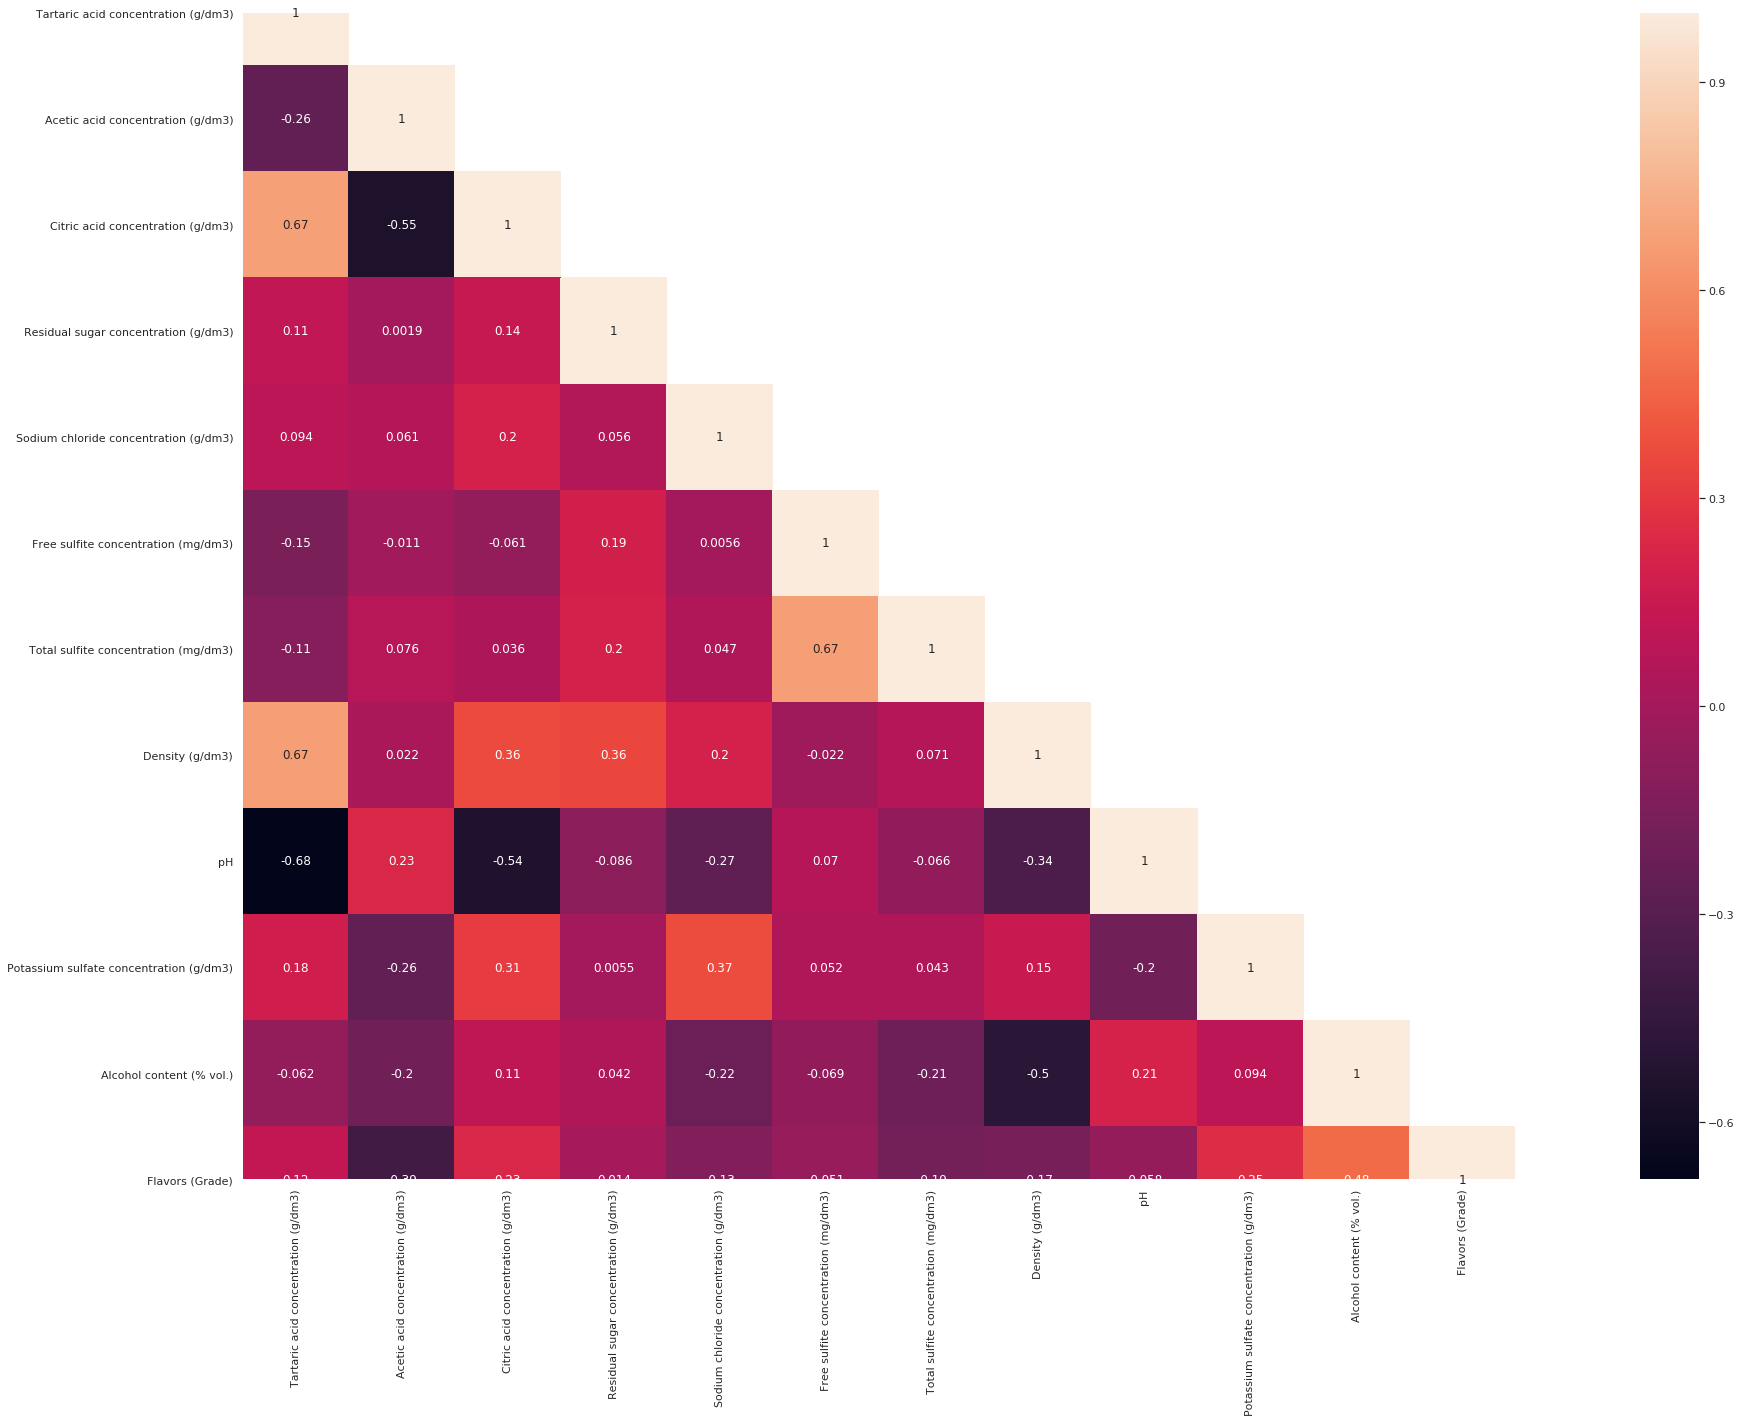

In [0]:
#corelation matrix.
cor_mat= df_red.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

#for saving the figure from Google colab
from google.colab import files
fig.savefig("red_wine_corr.png")
files.download("red_wine_corr.png")

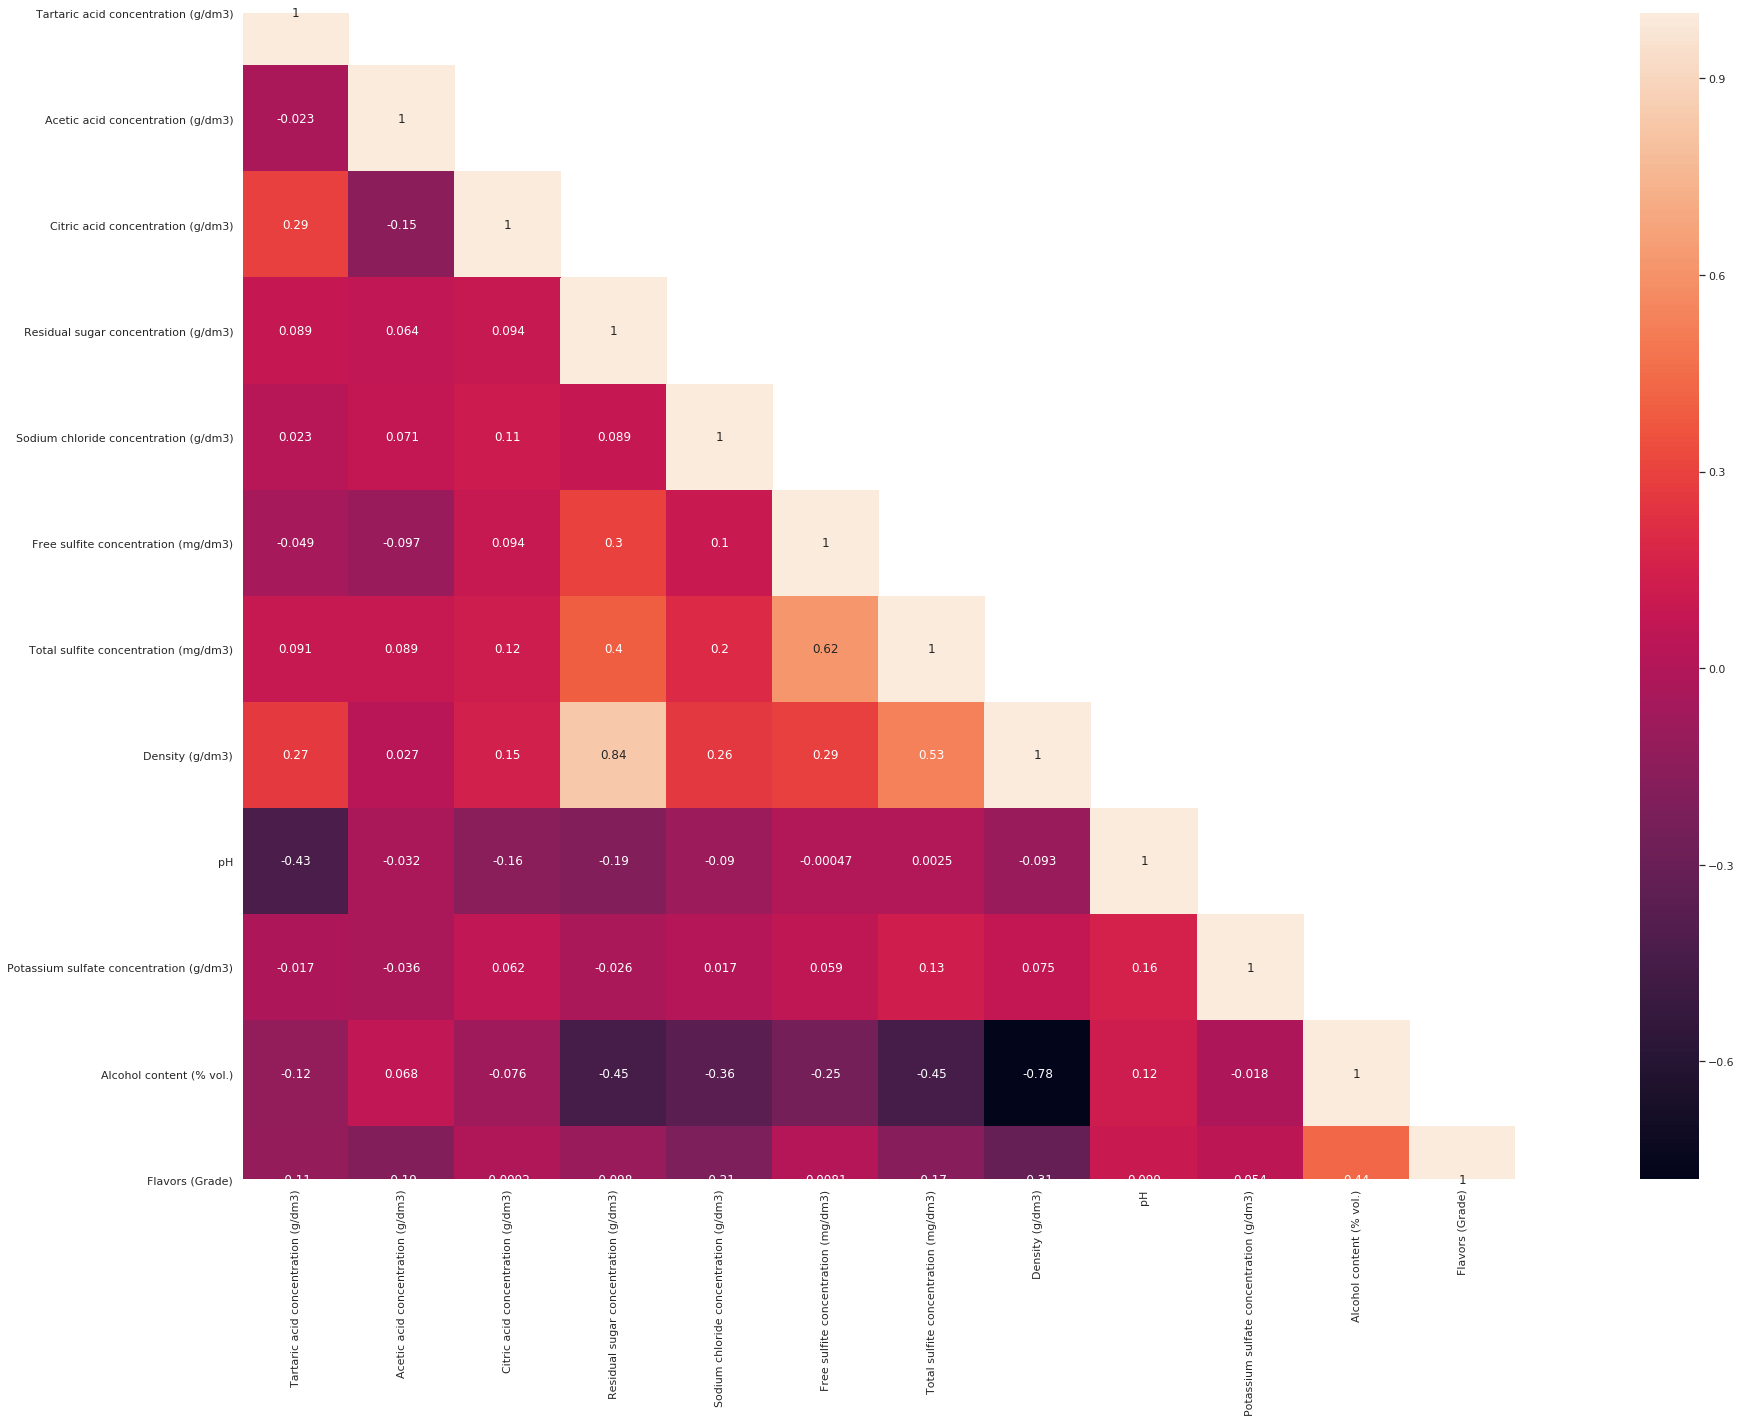

In [0]:
#corelation matrix.
cor_mat= df_white.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [0]:
#Pairplot
#https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file 
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), rotation=45, horizontalalignment='right')
sns_plot = sns.pairplot(df_red, hue='Flavors (Grade)', size=2.5)
sns.axes_style() #to see the style params

NameError: ignored

In [0]:
def plot(feature_x,target='Flavors (Grade)'):
    sns.factorplot(x=target,y=feature_x,data=df_red,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df_red,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df_red,kind='swarm',size=5,aspect=1)

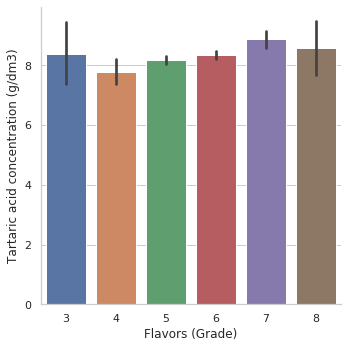

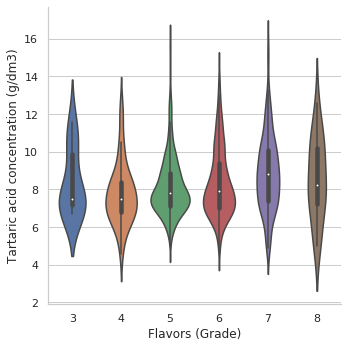

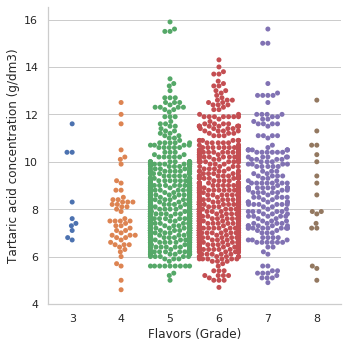

In [0]:
# for fixed acidity.
plot('Tartaric acid concentration (g/dm3)', 'Flavors (Grade)')

In [0]:
features = ['Tartaric acid concentration (g/dm3)', 'Acetic acid concentration (g/dm3)', 'Citric acid concentration (g/dm3)', 
          'Residual sugar concentration (g/dm3)', 'Sodium chloride concentration (g/dm3)', 'Free sulfite concentration (mg/dm3)', 
          'Total sulfite concentration (mg/dm3)', 'Density (g/dm3)', 
          'pH', 'Potassium sulfate concentration (g/dm3)', 'Alcohol content (% vol.)'] 
target = 'Flavors (Grade)'
X = df_red[features]
Y = df_red[target]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [0]:
X_train

,Tartaric acid concentration (g/dm3),Acetic acid concentration (g/dm3),Citric acid concentration (g/dm3),Residual sugar concentration (g/dm3),Sodium chloride concentration (g/dm3),Free sulfite concentration (mg/dm3),Total sulfite concentration (mg/dm3),Density (g/dm3),pH,Potassium sulfate concentration (g/dm3),Alcohol content (% vol.)
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.540,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.580,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [0]:
#These code segment is for 2 models only

def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(), LinearSVC()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train, y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred, y_test))
        print(acc_sc)
    #acc_frame[name_scaler]=np.array(acc_sc)

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))

#SINCE FEATURES HAVE DIFFERENT SCALES LET US TRY TO DO FEATURE SCALING AND SEE THE IMPACT.
scalers=[MinMaxScaler(), StandardScaler()]
names=['Min_Max_Scaler','Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df_red)
    scaled_df_red=scaler.transform(df_red)
    X=scaled_df_red[:,0:10]
    Y=df_red['Flavors (Grade)'].as_matrix()
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])

In [0]:
features = ['Tartaric acid concentration (g/dm3)', 'Acetic acid concentration (g/dm3)', 'Citric acid concentration (g/dm3)', 
          'Residual sugar concentration (g/dm3)', 'Sodium chloride concentration (g/dm3)', 'Free sulfite concentration (mg/dm3)', 
          'Total sulfite concentration (mg/dm3)', 'Density (g/dm3)', 
          'pH', 'Potassium sulfate concentration (g/dm3)', 'Alcohol content (% vol.)'] 
target = 'Flavors (Grade)'
X = df_red[features]
Y = df_red[target]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [0]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Accuracy': [0.5625,
  0.48541666666666666,
  0.5604166666666667,
  0.48541666666666666,
  0.6520833333333333,
  0.5791666666666667,
  0.6291666666666667,
  0.5416666666666666],
 'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB']}

In [0]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.562500
1,LinearSVM,0.485417
2,rbfSVM,0.560417
3,KNearestNeighbors,0.485417
4,RandomForestClassifier,0.652083
5,DecisionTree,0.579167
6,GradientBoostingClassifier,0.629167
7,GaussianNB,0.541667


NOTE THAT THIS IS WITHOUT FEATURE SCALING. NOW SINCE FEATURES HAVE DIFFERENT SCALES LET US TRY TO DO FEATURE SCALING AND SEE THE IMPACT.

In [0]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)

In [0]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler', 'Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler = scalers[scale]
    scaler.fit(df_red)
    scaled_df=scaler.transform(df_red)
    X=scaled_df[:,0:10]
    Y=df_red['Flavors (Grade)'].as_matrix()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])

In [0]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.562500,0.531250,0.566667
1,LinearSVM,0.485417,0.562500,0.554167
2,rbfSVM,0.560417,0.541667,0.587500
3,KNearestNeighbors,0.485417,0.537500,0.560417
4,RandomForestClassifier,0.652083,0.591667,0.625000
5,DecisionTree,0.579167,0.589583,0.577083
6,GradientBoostingClassifier,0.629167,0.616667,0.625000
7,GaussianNB,0.541667,0.510417,0.510417


In [0]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_red)
X=scaled_df[:,0:10]
Y=df_red['Flavors (Grade)'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

Roc and auc

In [0]:
roc_array=np.zeros(shape=(4,2))


Logistic Regression

In [0]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
clf_lr.best_params_

{'C': 1, 'penalty': 'l1'}

In [0]:
print('Best CV Score:')
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

Best CV Score:


0.5764075067024129

In [0]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test) #Actual Prediction Accuracy

0.5645833333333333

In [0]:
roc_array[0]=[clf_lr.best_score_,accuracy_score(pred,y_test)]

Confusion matrix, without normalization
[[  0   0   0   1   0   0]
 [  0   0   9   8   0   0]
 [  0   0 150  45   0   0]
 [  0   0  82 111   7   0]
 [  0   0   5  46  10   0]
 [  0   0   0   3   3   0]]
              precision    recall  f1-score   support

           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000        17
           5   0.609756  0.769231  0.680272       195
           6   0.518692  0.555000  0.536232       200
           7   0.500000  0.163934  0.246914        61
           8   0.000000  0.000000  0.000000         6

    accuracy                       0.564583       480
   macro avg   0.271408  0.248028  0.243903       480
weighted avg   0.527377  0.564583  0.531169       480



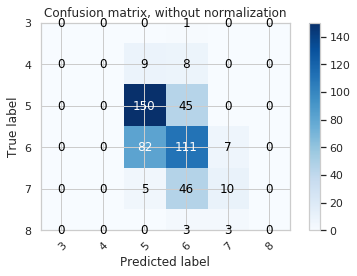

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=6))


KNN

In [0]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

KeyboardInterrupt: ignored

In [0]:
print('Best CV Score:')
clf_knn.best_score_

In [0]:
clf_knn.best_params_

In [0]:
pred=clf_knn.predict(x_test)

In [0]:
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')

SUPPORT VECTOR MACHINE (SVM)

In [0]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
print('Best CV Score:')
clf.best_score_

0.6523681858802503

In [0]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [0]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
print('Best CV Score:')
clf_svm.best_score_

Best CV Score:


0.6657730116175157

In [0]:
clf_svm.best_params_

{'C': 1.5, 'gamma': 0.96, 'kernel': 'rbf'}

In [0]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.61875

In [0]:
roc_array[1]=[clf_lr.best_score_,accuracy_score(pred,y_test)]

Confusion matrix, without normalization
[[  0   0   0   1   0   0]
 [  0   0  10   7   0   0]
 [  0   0 144  49   2   0]
 [  0   0  61 124  15   0]
 [  0   0   3  28  29   1]
 [  0   0   0   4   2   0]]
              precision    recall  f1-score   support

           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000        17
           5   0.660550  0.738462  0.697337       195
           6   0.582160  0.620000  0.600484       200
           7   0.604167  0.475410  0.532110        61
           8   0.000000  0.000000  0.000000         6

    accuracy                       0.618750       480
   macro avg   0.307813  0.305645  0.304988       480
weighted avg   0.587695  0.618750  0.601117       480



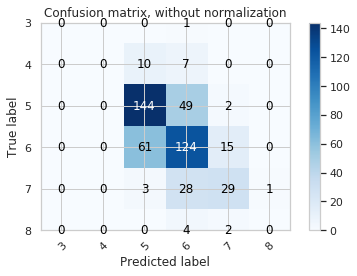

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=6))

Random Forest

In [0]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [0]:
print('Best CV Score:')
clf_rf.best_score_

Best CV Score:


0.6738159070598749

In [0]:
clf_rf.best_params_

{'max_features': 'log2', 'n_estimators': 500}

In [0]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.6520833333333333

In [0]:
roc_array[2]=[clf_lr.best_score_,accuracy_score(pred,y_test)]

Confusion matrix, without normalization
[[  0   0   0   1   0   0]
 [  0   0  11   6   0   0]
 [  0   0 145  47   3   0]
 [  0   0  49 141  10   0]
 [  0   0   1  33  26   1]
 [  0   0   0   2   3   1]]
              precision    recall  f1-score   support

           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000        17
           5   0.703883  0.743590  0.723192       195
           6   0.613043  0.705000  0.655814       200
           7   0.619048  0.426230  0.504854        61
           8   0.500000  0.166667  0.250000         6

    accuracy                       0.652083       480
   macro avg   0.405996  0.340248  0.355643       480
weighted avg   0.626308  0.652083  0.634336       480



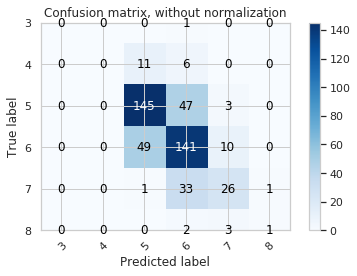

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=6))

Gradient Boosting

In [0]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

In [0]:
print('Best CV Score:')
clf_gb.best_score_

Best CV Score:


0.6371760500446828

In [0]:
clf_gb.best_params_

{'n_estimators': 500}

In [0]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.6541666666666667

In [0]:
roc_array[3]=[clf_lr.best_score_,accuracy_score(pred,y_test)]

In [0]:
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
   

    print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    np.set_printoptions(precision=2)
    plt.savefig("confMat.png")

Confusion matrix, without normalization
[[  0   0   0   1   0   0]
 [  1   1   7   8   0   0]
 [  1   0 152  38   3   1]
 [  1   1  49 128  18   3]
 [  0   0   4  24  32   1]
 [  0   0   0   3   2   1]]
              precision    recall  f1-score   support

           3   0.000000  0.000000  0.000000         1
           4   0.500000  0.058824  0.105263        17
           5   0.716981  0.779487  0.746929       195
           6   0.633663  0.640000  0.636816       200
           7   0.581818  0.524590  0.551724        61
           8   0.166667  0.166667  0.166667         6

    accuracy                       0.654167       480
   macro avg   0.433188  0.361595  0.367900       480
weighted avg   0.649031  0.654167  0.644706       480



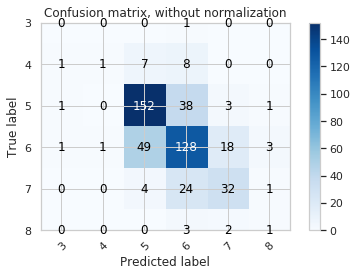

In [0]:
#https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#confusionMatrix and scores
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=6))

In [0]:
from sklearn.metrics import precision_recall_fscore_support as score
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
precision, recall, fscore, support = score(y_test, pred, average=None)
print('Label: {}'.format(classes))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

NameError: ignored

ROC and AUC


In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [0]:
# list of model variables and model names
models = ['log_reg', 'svm', 'rf', 'gb']
models_name = ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting']

colors = ['deeppink', 'navy', 'aqua', 'cornflowerblue']
models_name_short = ['LR', 'SVM', 'RF', 'GB']

for model, model_name, model_name_short, color in zip(models, models_name, models_name_short, colors):
	if model_name == 'Linear SVC':
		model_score = model.decision_function(x_test)
		fpr, tpr, thresholds = roc_curve(y_test, model_score)
	else:
		predictions = model.predict_proba(x_test)
		fpr, tpr, thresholds = roc_curve(y_test, predictions[:,1])
	
	roc_auc = auc(fpr, tpr)
	print ("AUC value of", model_name, ":", roc_auc)

	plt.plot(fpr, tpr, color=color, label='ROC of {} (AUC={})'.format(model_name_short, round(roc_auc,3)))

plt.title('Receiver Operating Characteristic (ROC) curve of all models')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
#plt.show()
plt.savefig('ROC curve of all model.png')